In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Functions

In [23]:
def trim_data(xdata,ydata):
    
    npoints = len(xdata)

    values = np.vstack([xdata,ydata])
    kernel = stats.gaussian_kde(values)
    Z = np.reshape(kernel(values).T,xdata.shape)
    
    sort = [i for i in Z]
    sort.sort()
    cut = sort[int(0.1*npoints)]
    
    xcut = []
    ycut = []
    for i in range(npoints):
        if Z[i] >= cut:
            xcut.append(xdata[i])
            ycut.append(ydata[i])
    
    return np.array(xcut),np.array(ycut),cut

In [26]:
# This function plots the contours given the data and the cut from the kde
def contours(X, Y, cut, ax, x_bw=False, y_bw=False, gridsize=200):

    # default bandwidths
    if x_bw == False:
        x_bw = np.std(X)/3
    if y_bw == False:
        y_bw = np.std(Y)/2

    # contour outline
    cs = sns.kdeplot(X,Y,n_levels=[0,cut,1],cmap=BLACK,bw=[x_bw,y_bw],
                                                        gridsize=gridsize,ax=ax)
    # axis labels
    ax.set_xlabel('1n events',horizontalalignment='right',x=1.0)
    ax.set_ylabel('2n events',horizontalalignment='right', y=1.0)
    
    return cs

In [27]:
# Define colors for the contours below
GRAY = sns.light_palette('lightgray',n_colors=1,as_cmap=True)
BLACK = sns.dark_palette('black',n_colors=1,as_cmap=True)

In [28]:
oneN, twoN = np.load('unfolded_data/halo2_10kpc_unfolded_E30.npy')

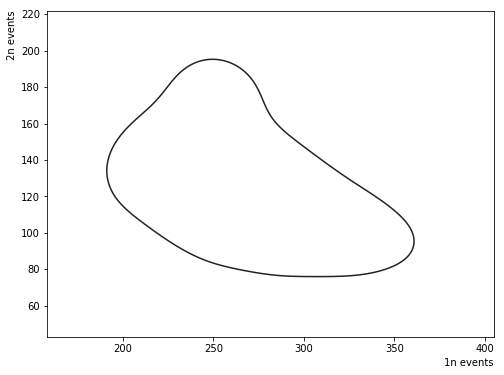

In [29]:
x,y,cut = trim_data(oneN,twoN)
fig,ax = plt.subplots(1,1,figsize=(8,6))
cs = contours(x,y,cut,ax)

12013.16008228765


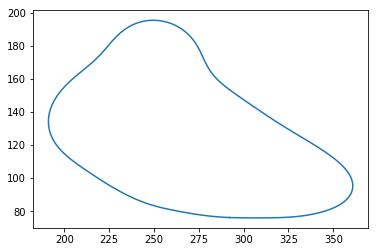

In [31]:
# get the vertices
p = cs.collections[0].get_paths()[0]
x = p.vertices[:,0]
y = p.vertices[:,1]
# area with Green's theorem
area=0.5*np.sum(y[:-1]*np.diff(x) - x[:-1]*np.diff(y))
area=np.abs(area)
print(area)

# plot the contour as proof
plt.plot(x,y)
plt.show()

In [33]:
prior1n,prior2n = np.load('priors/prior_halo2_10kpc_truth.npy')
prior_area = len(prior1n)
print(prior_area)
print('exclusion =',1-area/prior_area)

46326
exclusion = 0.7406821205740265
